# Case Study 1: AdaBoost Classifier (Iris Dataset)

This notebook demonstrates using **AdaBoost** for classification on the Iris dataset. We'll cover data loading, training, evaluation, and feature importance.

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
pd.DataFrame(X, columns=feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [5]:
# Fit AdaBoost with DecisionTree stumps
base = DecisionTreeClassifier(max_depth=1, random_state=42)
adb = AdaBoostClassifier(estimator=base, n_estimators=50, learning_rate=1.0, random_state=42)
adb.fit(X_train, y_train)

# Predictions
y_pred = adb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8947368421052632

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.92      0.86        13
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



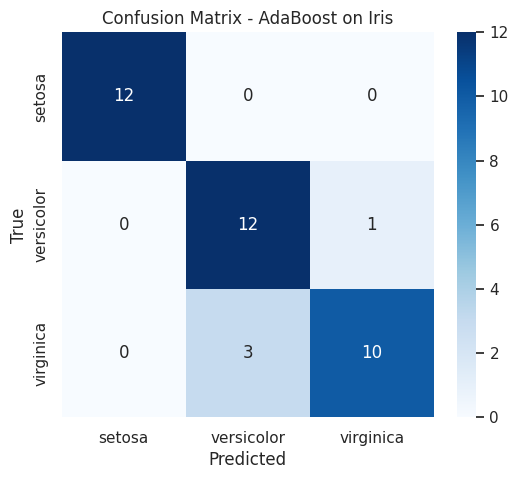

In [6]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - AdaBoost on Iris')
plt.show()

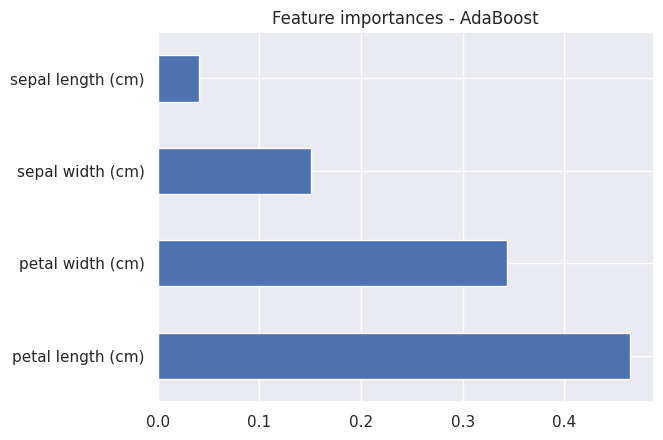

In [7]:
# Feature importances (AdaBoost exposes feature_importances_)
importances = adb.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='barh');
plt.title('Feature importances - AdaBoost')
plt.show()

In [9]:
# Hyperparameter tuning (quick grid)
param_grid = {
    'n_estimators': [20, 50, 100],
    'learning_rate': [0.1, 0.5, 1.0]
}
gs = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42), param_grid, cv=3, scoring='accuracy')
gs.fit(X_train, y_train)
print('Best params:', gs.best_params_)
print('Best CV score:', gs.best_score_)

best = gs.best_estimator_
y_pred_best = best.predict(X_test)
print('Test accuracy (best):', accuracy_score(y_test, y_pred_best))

Best params: {'learning_rate': 0.1, 'n_estimators': 100}
Best CV score: 0.9642010431484116
Test accuracy (best): 0.9473684210526315


## Takeaways

- AdaBoost combines weak learners (stumps) to form a strong classifier.
- It works well on small multiclass problems like Iris.
- Tune `n_estimators` and `learning_rate` for best performance.